<a href="https://colab.research.google.com/github/Garima-Mathur/Mailbox_app_njit/blob/master/garima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW1:   S&P500 Index Prediction

 

The objectives of this homework are to (1) implement gradient descent by yourself and (2) get familiar with model selection.

Due time: 11:30AM on Sep. 13 Monday. Submit through Canvas.

 

Dataset:

Training data: SPY close prices of 2017-2020

Testing data: SPY close prices of Jan. 2021- Aug. 2021.



 

Problem formulation:  Given the previous N data points, you are going to predict the next value. n=1, ……, N.   N is a hyperparameter.

 

Model function: Linear function xt = f(xt-n, xt-n+1, …, xt-1)

 

Loss function: MSE

 

Find the best N. Report loss for both training and testing data from 1 to the identified N.  Show the values in a table and also plot them. For the best N, report the weights.

 

Suppose your best linear model is

xt’ = b2 * xt-2 + b1 * xt-1 + b0

You should report the best parameters, the function F and the value of N.

For example

xt’ = 0.83 * xt-2 + 0.54 *  xt-1 - 4.5 and N=2

Input variable: X 

Output variable: y_hat, the prediction 

Linear model: y_hat = b0 + b1x1 + b2x2 + … + bnxn

 

xi is the ith feature in the input variable. By introducing x0 = 1, we can rewrite this equation.

 

y_hat = b0x0 + b1x1 + b2x2 + … + bnxn

 

Convert it to matrix form: 

 

y_hat = BTX  (T is transpose sign)

 

Where B = [b0  b1 b2 … bn]T  and X = [x0  x1 x2 … xn]T

 

Use MSE as the loss function: 

 

J(B) = 1/(2m) * sum(y_hati - yi)2, where m is the total number of samples.

 

By minimizing this cost function, we can find weights B. You are required to use Gradient Descent.

 

Gradient Descent

 

Step 1: initialize values b0  b1 b2 … bn with some value. For example, random numbers or 0s.

Step 2: iteratively update, bj := bj - a * [d J(B)/ d bj] until it converges, i.e., when the loss does not decrease. a is the learning rate. You choose this value and you can test different values. 

[d J(B)/ d bj] is the partial derivative of cost with respect to each bj

 

After solving the above function, we have

 

bj:= bj - a * (1/m) * sum[(y_hati - yi) * xi]

 

We can vectorize all the equations so that all the bj can be calculated at the same time (no need to hard-code).

 

Check this post if you are not familiar with vectorization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#ls '/content/drive/My drive/FALL_2021_ALL/DL'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SPY_CLOSE.csv to SPY_CLOSE.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['SPY_CLOSE.csv'])) #pandas dataframe

In [ ]:
df2.head()
df2.tail()


,Date,Close
1168,8/24/2021,447.970001
1169,8/25/2021,448.910004
1170,8/26/2021,446.260010
1171,8/27/2021,450.250000
1172,8/30/2021,452.230011


In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])


In [ ]:
train_df = df2[df2['Date'] < '2021-01-01']
train_df.shape

(1007, 2)

In [ ]:
test_df = df2[df2['Date'] >= '2021-01-01']
test_df.shape 

(166, 2)

In [ ]:
Try = train_df.iloc[:,1][1:150]
prepared_try= Try.values.flatten()
prepared_try.shape
Test_Try = test_df.iloc[:,1][1:150]
prepared_test_try= Test_Try.values.flatten()
prepared_test_try.shape

(10,)

1 0.3492138035733434
2 0.19354293640649145
3 0.1568343885058689
4 0.1787505066523809
5 0.07525604675984479
6 0.024334390838499195
7 0.012894505343636273
8 9.340208146384415e-05
9 0.0
10 0.0
1 4.96457364477811e+84
2 8.382384420456214e+84
3 6.283549019305428e+84
4 2.481293416302043e+84
5 1.1135001923246183e+84
6 3.5021061330657045e+83
7 5.9306666358913715e+81
8 2.2980986650853714e+79
9 1.421992745205908e+78
10 1.421992745205908e+78


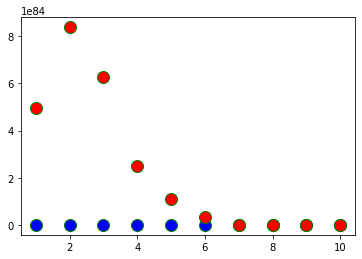

In [ ]:
# data preparation-Training 
for N_train in range(1,150):
  x = []
  y = []
  i = 0
  for i in range(len(prepared_try)-N_train):
    subarray = prepared_try[i: i+N_train+1]
    feature = subarray[:-1]
    label = [subarray[-1]]
    x.append(feature)
    X = np.array(x)
    y.append(label)
    Y = np.array(y)
    m = 0
    c = 0
    L = 0.00000001  # The learning Rate
    epochs = 1500  # The number of iterations to perform gradient descent
    n = float(len(X)) # Number of elements in X # Performing Gradient Descent 
    for j in range(epochs): 
      Y_pred = m*X + c  # The current predicted value of Y
      cost = sum([data**2 for data in (Y-Y_pred)]) / n
      cost_train=cost.min()
      D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
      D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
      m = m - L * D_m  # Update m
      c = c - L * D_c  # Update c
  print( N_train,cost_train)
  import matplotlib.pyplot as plt
  plt.plot(N_train,cost_train,color='green',linestyle='dashed',linewidth=3,marker='o',markerfacecolor='blue', markersize='12')

# data preparation-Testing 
for N_test in range(1,150):
  x = []
  y = []
  i = 0
  for i in range(len(prepared_test_try)-N_test):
    subarray = prepared_test_try[i: i+N_test+1]
    feature = subarray[:-1]
    label = [subarray[-1]]
    x.append(feature)
    X = np.array(x)
    y.append(label)
    Y = np.array(y)
    m = 0
    c = 0
    L = 0.00000001  # The learning Rate
    epochs = 1500  # The number of iterations to perform gradient descent
    n = float(len(X)) # Number of elements in X # Performing Gradient Descent 
    for j in range(epochs): 
      Y_pred = m*X + c  # The current predicted value of Y
      cost = sum([data**2 for data in (Y-Y_pred)]) / n
      cost_test = cost.min()
      D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
      D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
      m = m - L * D_m  # Update m
      c = c - L * D_c  # Update c
  print( N_test,cost_test)
  plt.plot(N_test,cost_test,color='green',linestyle='dashed',linewidth=3,marker='o',markerfacecolor='red', markersize='12')

In [ ]:
Test_Try = test_df.iloc[:,1][1:11]
prepared_test_try= Test_Try.values.flatten()
prepared_test_try.shape


(10,)

In [1]:
# 
'''data preparation-Testing 
for N_test in range(1,11):
  x = []
  y = []
  i = 0
  for i in range(len(prepared_test_try)-N_test):
    subarray = prepared_test_try[i: i+N_test+1]
    feature = subarray[:-1]
    label = [subarray[-1]]
    x.append(feature)
    X = np.array(x)
    y.append(label)
    Y = np.array(y)
    m = 0
    c = 0
    L = 0.00001  # The learning Rate
    epochs = 150  # The number of iterations to perform gradient descent
    n = float(len(X)) # Number of elements in X # Performing Gradient Descent 
    for j in range(epochs): 
      Y_pred = m*X + c  # The current predicted value of Y
      cost = sum([data**2 for data in (Y-Y_pred)]) / n
      cost_test = cost.min()
      D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
      D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
      m = m - L * D_m  # Update m
      c = c - L * D_c  # Update c
  print( N_test,cost_test)'''

NameError: ignored

In [2]:
'''import matplotlib.pyplot as plt
plt.plot(N_train,cost_train)
#plt.plot(N_test,cost_test, 'o:r')
plt.show()'''

NameError: ignored